In [2]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

project_root = pathlib.Path("/home/ftesshu/openpi")
actions_dir = project_root / "data/aloha_sim/actions"
actions_files = list(actions_dir.glob("actions_[0-9]*.npy"))

actions = np.zeros((len(actions_files), np.load(actions_files[0]).shape[0], np.load(actions_files[0]).shape[1]))
for i, file in enumerate(actions_files):
    print(f"Loading actions from {file}")
    actions[i] = np.load(file)
print(f"Actions shape: {actions.shape}")

Loading actions from /home/ftesshu/openpi/data/aloha_sim/actions/actions_9.npy
Loading actions from /home/ftesshu/openpi/data/aloha_sim/actions/actions_6.npy
Loading actions from /home/ftesshu/openpi/data/aloha_sim/actions/actions_8.npy
Loading actions from /home/ftesshu/openpi/data/aloha_sim/actions/actions_7.npy
Loading actions from /home/ftesshu/openpi/data/aloha_sim/actions/actions_5.npy
Actions shape: (5, 300, 14)


### Visualize actions

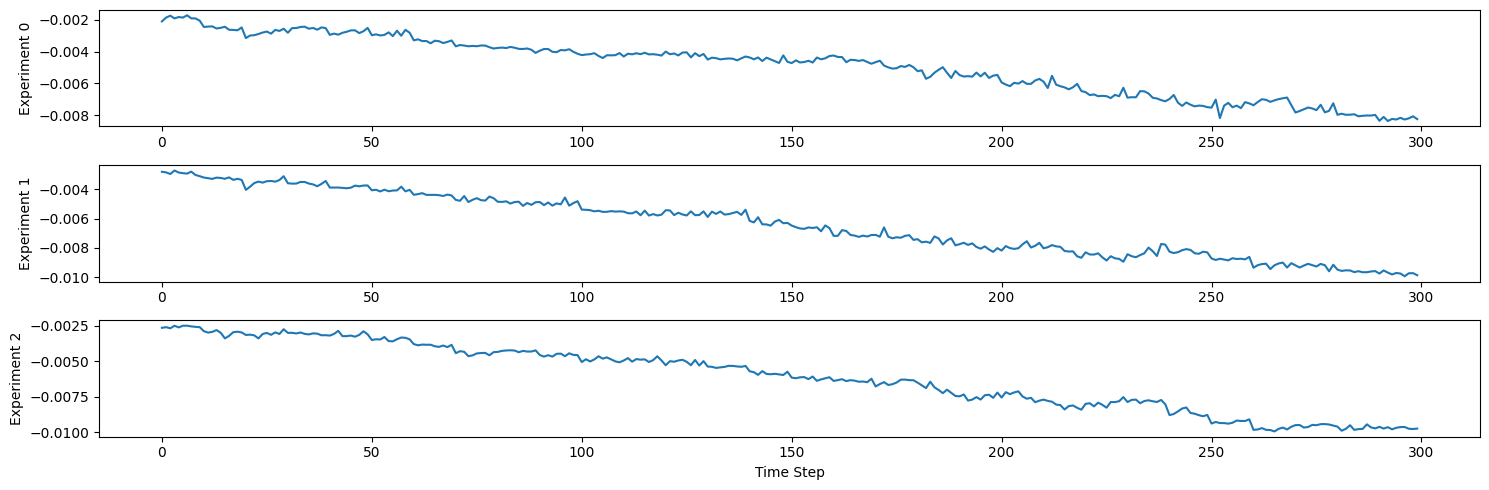

In [11]:
plt.figure(figsize=(15, 5))
num_dims = 1
for i in range(len(actions_files)):
    plt.subplot(len(actions_files), 1, i+1)
    plt.plot(actions[i][:, 0])
    plt.ylabel(f'Experiment {i}')
    if i == len(actions_files) - 1:
        plt.xlabel('Time Step')
plt.tight_layout()
plt.show()

### Variance of actions

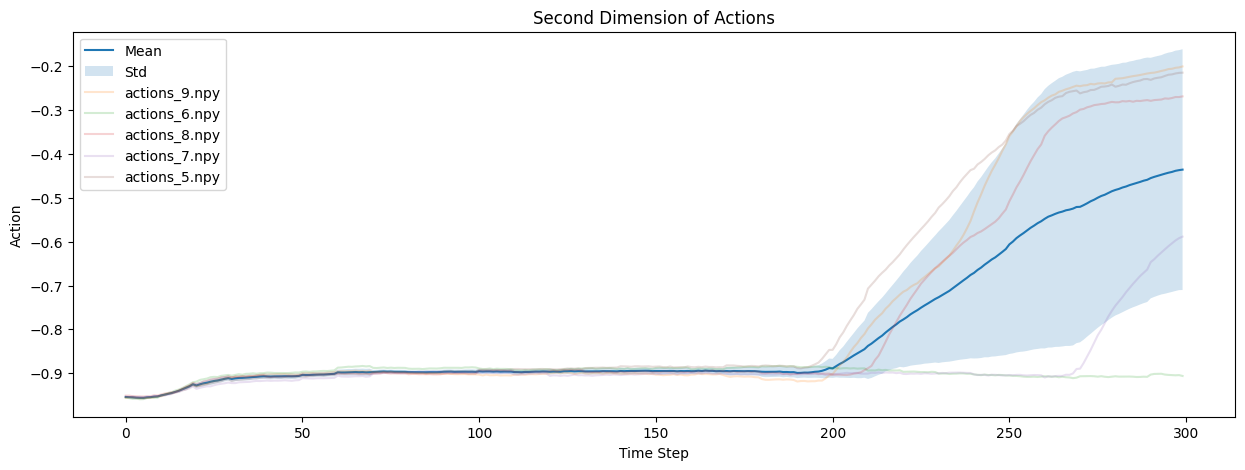

In [6]:
# plot the mean and std of the first dimension of the actions for each experiment

first_dim_actions = actions[:, :, 1]  # num_files x num_steps x 1

# take the mean along with the first axis
mean_first_dim_actions = np.mean(first_dim_actions, axis=0)
# take the std along with the first axis
std_first_dim_actions = np.std(first_dim_actions, axis=0)

# plot the mean and std
plt.figure(figsize=(15, 5))
plt.plot(mean_first_dim_actions, label="Mean")
plt.fill_between(range(len(mean_first_dim_actions)), mean_first_dim_actions - std_first_dim_actions, mean_first_dim_actions + std_first_dim_actions, alpha=0.2, label="Std")
# also plot each experiment
for i in range(len(actions_files)):
    plt.plot(first_dim_actions[i, :], label=actions_files[i].name, alpha = 0.2)
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Action')
plt.title('Second Dimension of Actions')
plt.show()
